#Breast cancer Prediction
#-[Krunal Suthar](http://krunalsuthar.ml)

![](https://drive.google.com/uc?id=16c6UtqGFDrJNordq9lIursSR0Ks5W8k6)

I have used the Wisconsin Breast cancer dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml) availaible [here](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)).
<br>
I have used Artificial Neural Networks for this problem and found out the best hyper parameters using cross validation.<br>For more details read my research paper [here](https://iarjset.com/papers/machine-learning-as-a-decision-aid-for-breast-cancer-diagnosis/).
<br><br>
![](https://drive.google.com/uc?id=1ETVCulfECkSBOcZXtXLnaDUIjnpoZMu5)
<br>
<br>
![](https://drive.google.com/uc?id=1mIKCJ6wyvSMrx-oa4IFRGG5FUR8pPOKN)

---


<font color="red">**Data Set Information:**</font>

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found [here](www.cs.wisc.edu/~street/images/)



---



<font color="red">**Attribute Information:**</font>

1) ID number<br>
2) Diagnosis (M = malignant, B = benign)<br>
3-32)<br>
<br>
<font color="light green">*Ten real-valued features are computed for each cell nucleus:*</font><br>

a) radius (mean of distances from center to points on the perimeter)<br>
b) texture (standard deviation of gray-scale values)<br>
c) perimeter<br>
d) area<br>
e) smoothness (local variation in radius lengths)<br>
f) compactness ($\frac{perimeter^2}{area} - 1.0$)<br>
g) concavity (severity of concave portions of the contour)<br>
h) concave points (number of concave portions of the contour)<br>
i) symmetry<br>
j) fractal dimension ("coastline approximation" - 1)<br>

# Import required libraries

functions which we will take a look at in the later part.
sklearn to

Select the model with best hyper parameters
Encode the labels i.e. M and B
Print a confusion matrix with test data results
Make a train / test split easily
Scale values

tensorflow and keras to create our model (ANN) and make some plots of it

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from IPython.display import SVG
from keras.utils import model_to_dot
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from google.colab import files
uploaded=files.upload()


Saving CANCER_PRED.data to CANCER_PRED.data


In [5]:
import io

df=pd.read_csv(io.StringIO(uploaded['CANCER_PRED.data'].decode('utf=8')),sep=',')
df

842302  M  17.99  10.38  ...  0.7119  0.2654  0.4601   0.1189
0      842517  M  20.57  17.77  ...  0.2416  0.1860  0.2750  0.08902
1    84300903  M  19.69  21.25  ...  0.4504  0.2430  0.3613  0.08758
2    84348301  M  11.42  20.38  ...  0.6869  0.2575  0.6638  0.17300
3    84358402  M  20.29  14.34  ...  0.4000  0.1625  0.2364  0.07678
4      843786  M  12.45  15.70  ...  0.5355  0.1741  0.3985  0.12440
..        ... ..    ...    ...  ...     ...     ...     ...      ...
563    926424  M  21.56  22.39  ...  0.4107  0.2216  0.2060  0.07115
564    926682  M  20.13  28.25  ...  0.3215  0.1628  0.2572  0.06637
565    926954  M  16.60  28.08  ...  0.3403  0.1418  0.2218  0.07820
566    927241  M  20.60  29.33  ...  0.9387  0.2650  0.4087  0.12400
567     92751  B   7.76  24.54  ...  0.0000  0.0000  0.2871  0.07039

[568 rows x 32 columns]

### Analyze the dataset

# We will now analyze our data :


1.Print the features of dataset which are also mentioned above<br>
2.View how many samples and missing values there are for each feature and display them accordingly<br>
We here see the missing samples and values:
```
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
842302      568 non-null int64
M           568 non-null object
17.99       568 non-null float64
10.38       568 non-null float64
122.8       568 non-null float64
1001        568 non-null float64
0.1184      568 non-null float64
0.2776      568 non-null float64
...
...
0.4601      568 non-null float64
0.1189      568 non-null float64
dtypes: float64(30), int64(1), object(1)
memory usage: 142.1+ KB
None
```

3.View numerical features of data set we will majorly focus on `mean`, `count`, `std`, `min value`, `max value`, `upper quartile`, `inter quartile` and `lower quartile`<br>
For this all we need to do is `dataset.describe()` So this justifies our use of `pandas` library.<br>
4.We will now take a look at the label features specially `count`, `unique`, `top` and `frequency`. The `count` parameter just tells us the number of entries, the `unique` parameter is important.
Here we receive -
```
unique: 2
```
Which tells us to perform2 class classification.<br>
The `top` parameter is often used to check biases in the data set itself.

In [7]:
def analyze(data):
    
  # View features in data set
  print("Dataset Features")
  print(data.columns.values)
  print("=" * 30)
    
  # View How many samples and how many missing values for each feature
  print("Dataset Features Details")
  print(data.info())
  print("=" * 30)
    
  # view distribution of numerical features across the data set
  print("Dataset Numerical Features")
  print(data.describe())
  print("=" * 30)
    
  # view distribution of categorical features across the data set
  print("Dataset Categorical Features")
  print(data.describe(include=['O']))
  print("=" * 30)

In [9]:
analyze(df)

Dataset Features
['842302' 'M' '17.99' '10.38' '122.8' '1001' '0.1184' '0.2776' '0.3001'
 '0.1471' '0.2419' '0.07871' '1.095' '0.9053' '8.589' '153.4' '0.006399'
 '0.04904' '0.05373' '0.01587' '0.03003' '0.006193' '25.38' '17.33'
 '184.6' '2019' '0.1622' '0.6656' '0.7119' '0.2654' '0.4601' '0.1189']
Dataset Features Details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   842302    568 non-null    int64  
 1   M         568 non-null    object 
 2   17.99     568 non-null    float64
 3   10.38     568 non-null    float64
 4   122.8     568 non-null    float64
 5   1001      568 non-null    float64
 6   0.1184    568 non-null    float64
 7   0.2776    568 non-null    float64
 8   0.3001    568 non-null    float64
 9   0.1471    568 non-null    float64
 10  0.2419    568 non-null    float64
 11  0.07871   568 non-null    float64
 12  1.095     568 non-

### Make a feature pairplot

We will now make a feature wise pairplot meaning we will plot labels  x1 ,  x2 ,  ...  and or label  y  with each other. Where  x  and  y  have their usual meaning. We will use seaborn to help us with this. A pair plot allows us to see both distribution of single variables and relationships between two variables . Pair plots are a great method to identify trends for follow-up analysis. So this again becomes an important step for us.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


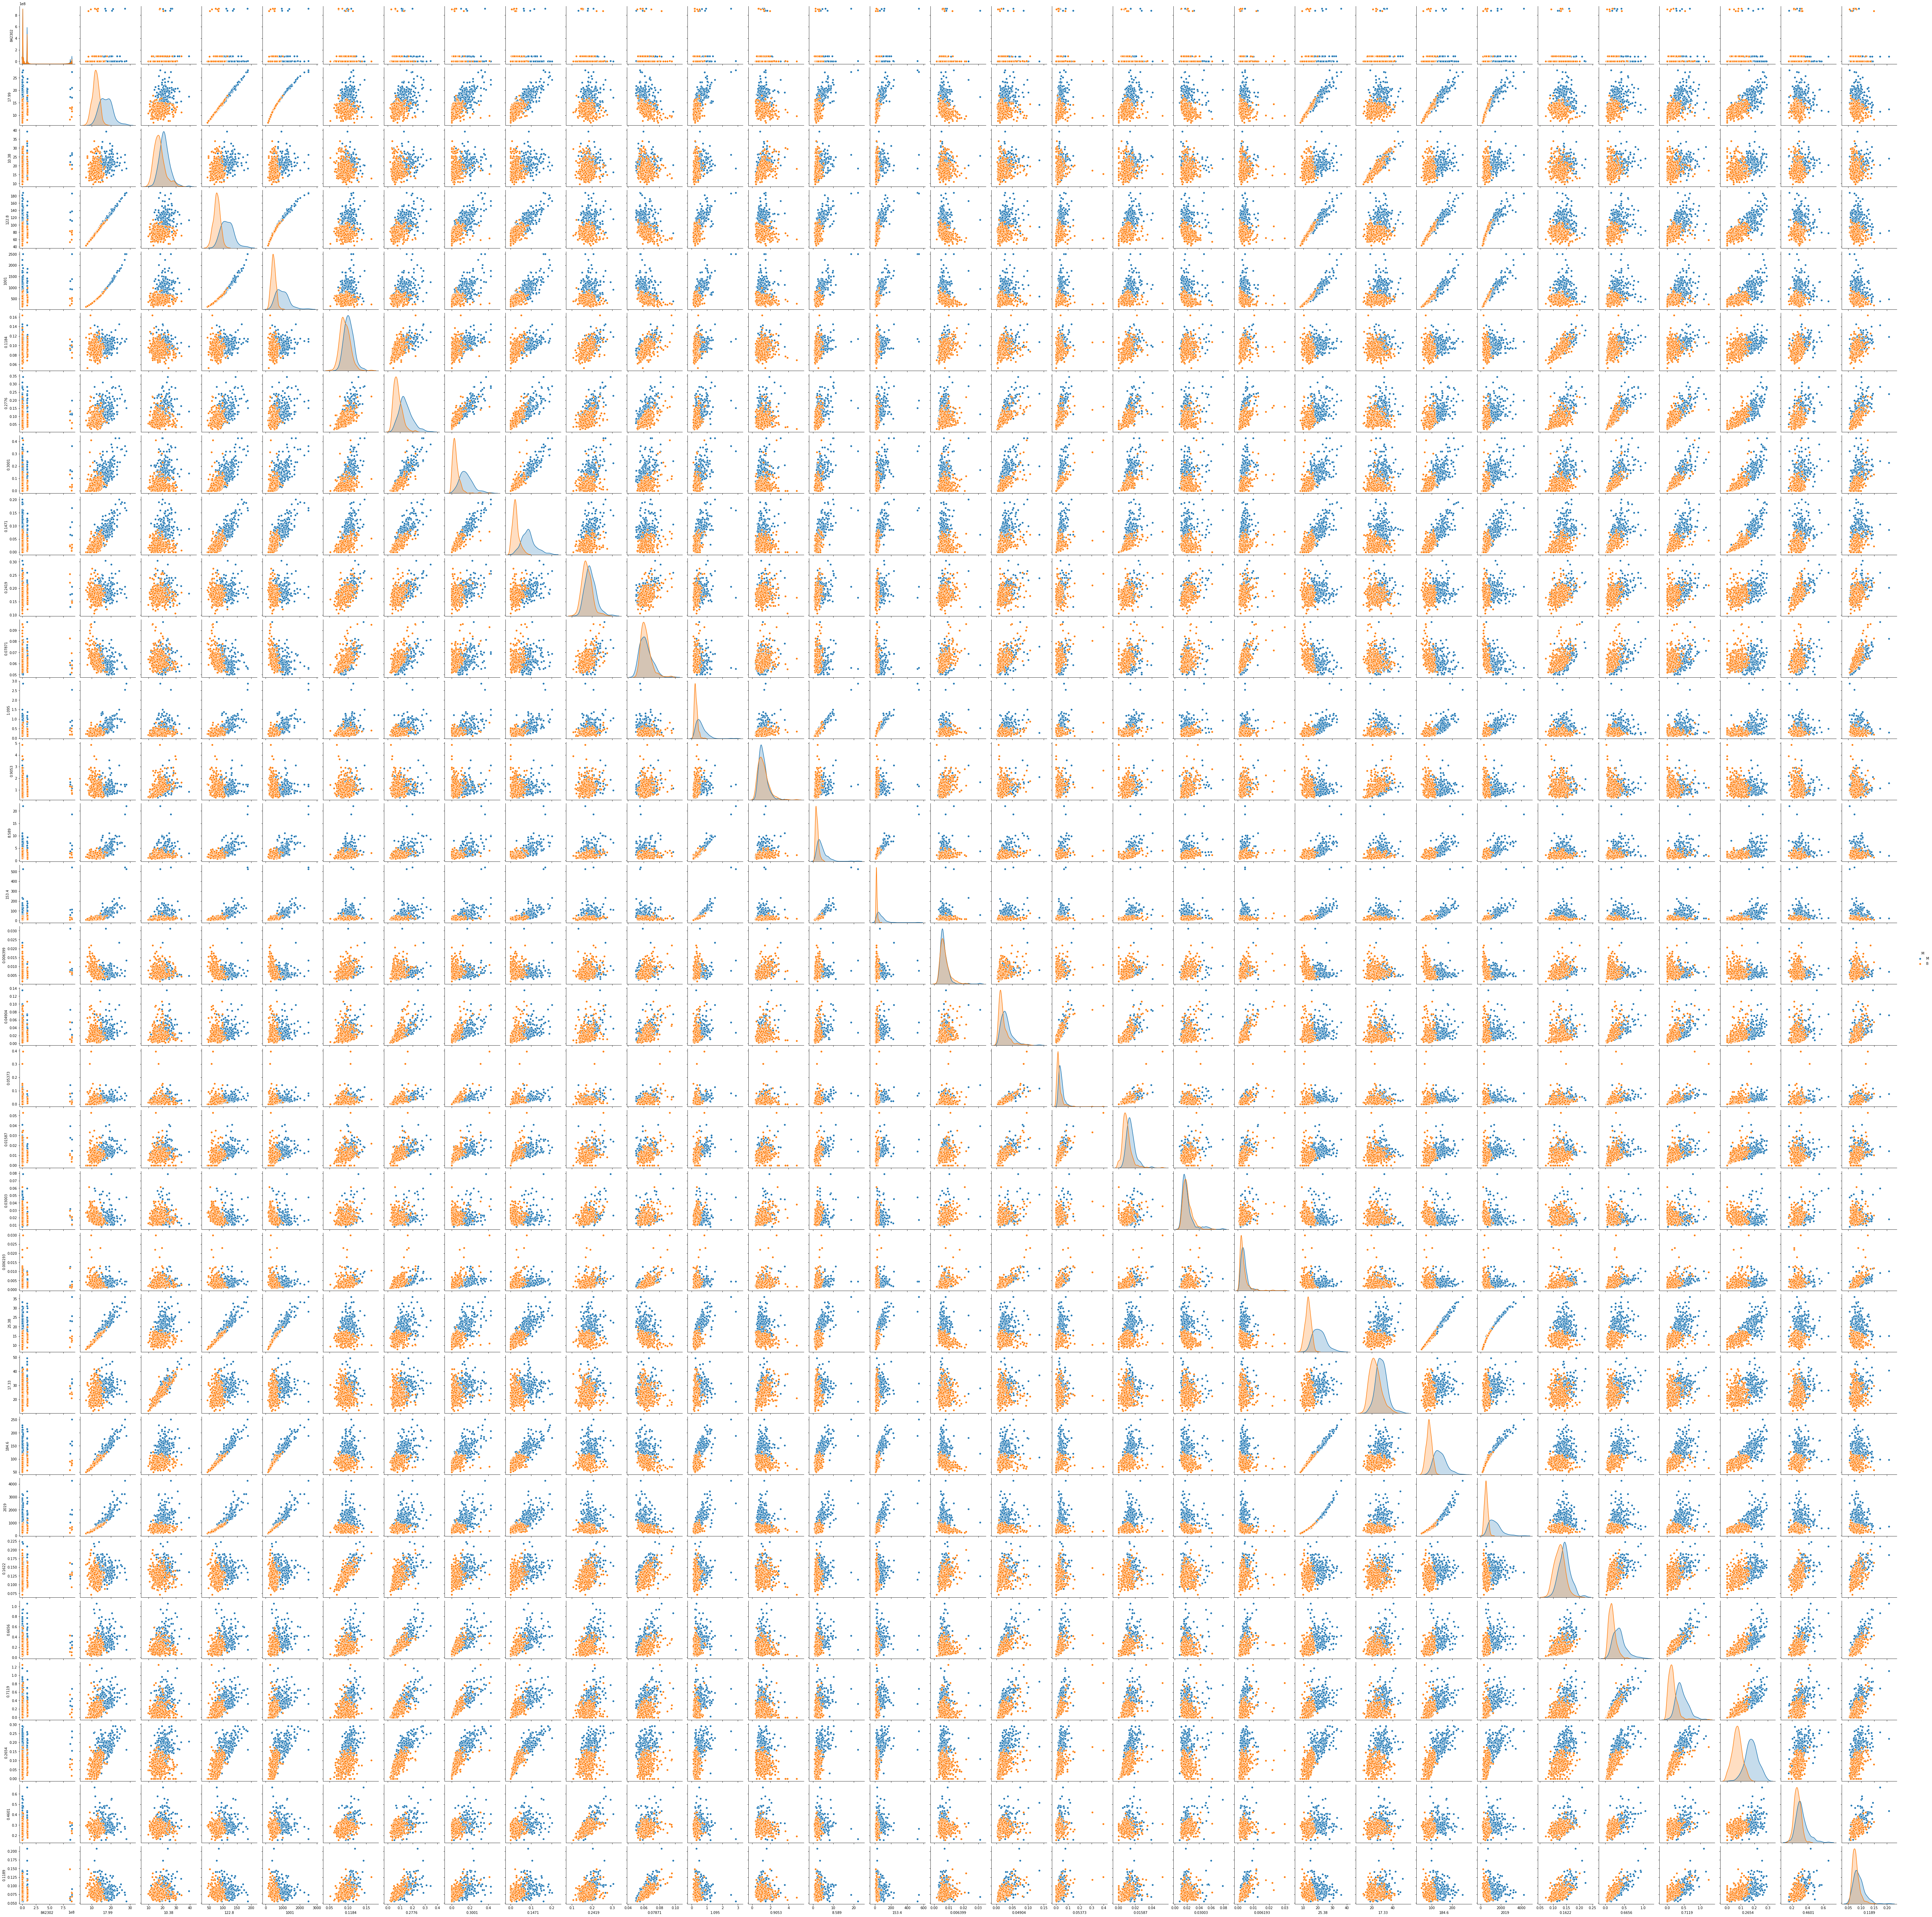

In [10]:
sns.pairplot(df, hue="M", size= 2.5)

### Seperate the the features and labels




This is just a simple code which stores $X$ or the features and $y$ or the labels in different variables

In [11]:
X = df.iloc[:,2:32] 
y = df.iloc[:,1] 